# Visualizing hierarchies


## t-SNE

Creates 2d map of a dataset and provides useful insights about the proximity of the samples to one another.

## Hierachacal groups

Hierarchies are often found in a real worlds scenarios. Great example of such is:
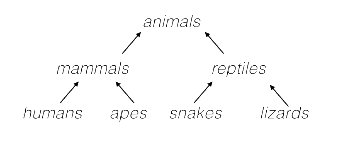

(datacamp image)


We will try to cluster eurovision voting countries and visualize it as a dendrogram (tree-like diagram).

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

In [3]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv')
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From country     1066 non-null   object 
 1   To country       1066 non-null   object 
 2   Jury A           1066 non-null   int64  
 3   Jury B           1066 non-null   int64  
 4   Jury C           1066 non-null   int64  
 5   Jury D           1066 non-null   int64  
 6   Jury E           1066 non-null   int64  
 7   Jury Rank        1066 non-null   int64  
 8   Televote Rank    1066 non-null   int64  
 9   Jury Points      420 non-null    float64
 10  Televote Points  420 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 91.7+ KB


In [27]:
samples = df.values[:25,-4].astype(float)
country_names = df.values[:25,1]

In the begining every country has its own cluster. The number of clusters is equal to the number of countries. With every step the two closest clusters are merged. The process iterates until it is only one cluster. 

This type of hierarchical clustering is called 'agglomerative'. On the opposite side we have 'divise' clustering.

We already selected the necessary columns with scores and names of the countries. Let's link them with scipy.

In [28]:
# calc the distance matrix (linkage func is expecting distance matrix)
distance_matrix = pdist(samples.reshape(-1,1))
mergins = linkage(distance_matrix, method='complete')

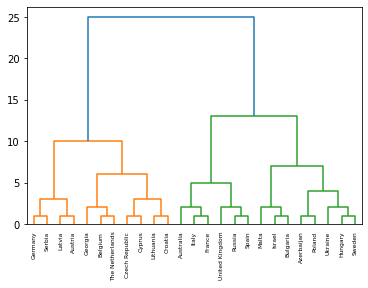

<Figure size 1800x1080 with 0 Axes>

In [33]:
# passing output of linkage to dendrogram func
dendrogram(mergins,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6)
plt.figure(figsize=(25,15))
plt.show()